In [1]:
from pymodules.create_one_hot_encoded_map_from_mask import get_one_hot_map
from pymodules.adaptive_objective_functions import adaptive_dice_loss,ca_loss
from PIL import Image
from numpy import asarray
from os import walk
%env SM_FRAMEWORK=tf.keras
import segmentation_models as sm
import numpy as np
from pymodules.data import train_generator,test_generator
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from pymodules.unet_model import unet
from tensorflow.keras.callbacks import ModelCheckpoint, LearningRateScheduler
from tensorflow.keras.callbacks import  EarlyStopping, ReduceLROnPlateau 
import tensorflow as tf
import segmentation_models as sm
import keras
from pathlib import Path

env: SM_FRAMEWORK=tf.keras
Segmentation Models: using `tf.keras` framework.


In [2]:
learned_masks = []
classes_color_dict = {0:[0,150,130],1:[64,64,64],2:[255,255,255],3:[0,0,0]}

class CustomCallback(keras.callbacks.Callback):
    def on_epoch_begin(self, epoch, logs=None):
        predicted = model.predict(X_test[1].reshape(1,256,256,3))
        learned_masks.append(predicted[0])
        disp_array = np.repeat(np.zeros(list(predicted[0].shape[:2])).reshape(256,256,1),3,axis=2)
        for key in classes_color_dict:
            true_values = np.full(list(predicted[0].shape[:2]) + [3],classes_color_dict.get(key))
            disp_array = np.where(np.repeat((np.argmax(predicted[0],axis=2) == key).reshape(256,256,1),3,axis=2),true_values,disp_array)
        f, axarr = plt.subplots(1,2)
        axarr[0].imshow(X_test[1])
        axarr[1].imshow(disp_array.astype(int))
        plt.show()

In [3]:
import numpy as np
import cv2
import os
from PIL import Image

# color map is different on test data
col_map = [[255,255,255],[20,20,20],[19,19,19],[0,0,0]]

X_test = []
for filepath in os.listdir('../data/test_images/ventral_samples_R0004'):
    image = Image.open('../data/test_images/ventral_samples_R0004/'+filepath)
    image = image.resize((256, 256))
    # convert image to numpy array
    data = np.asarray(image)
    data = data/255.
    X_test.append(data)
X_test = np.array(X_test)
Y_test = []
for filepath in os.listdir('../data/test_images/ventral_mask_combined_R0004'):
    image = Image.open('../data/test_images/ventral_mask_combined_R0004/'+filepath)
    image = image.resize((256, 256)) 
    Y_test.append(get_one_hot_map(np.asarray(image),col_map))
Y_test = tf.stack(Y_test)

In [4]:
import sys 
import os
import pickle

#stdoutOrigin=sys.stdout 
#sys.stdout = open("log.txt", "a")

---------------------
Missing Ratio: 0.000000
---------------------
Instructions for updating:
Please use Model.fit, which supports generators.
Found 565 images belonging to 1 classes.
Found 565 masks containing 3 classes.
Removing 0% of masks of the following class(es): ['ventral_mask_atrium', 'ventral_mask_bulbus', 'ventral_mask_heart']


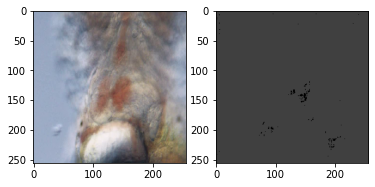

Epoch 1/250
Instructions for updating:
Use fn_output_signature instead
250/250 [==============================] - ETA: 0s - loss: 0.8211 - accuracy: 0.5961
Epoch 00001: val_loss improved from inf to 0.95440, saving model to ./missing_labels_test/0.0\weights_custom_loss.hdf5
250/250 [==============================] - 224s 896ms/step - loss: 0.8211 - accuracy: 0.5961 - val_loss: 0.9544 - val_accuracy: 0.0139


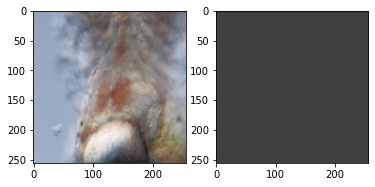

Epoch 2/250
250/250 [==============================] - ETA: 0s - loss: 0.7280 - accuracy: 0.7763
Epoch 00002: val_loss improved from 0.95440 to 0.91337, saving model to ./missing_labels_test/0.0\weights_custom_loss.hdf5
250/250 [==============================] - 221s 885ms/step - loss: 0.7280 - accuracy: 0.7763 - val_loss: 0.9134 - val_accuracy: 0.0235


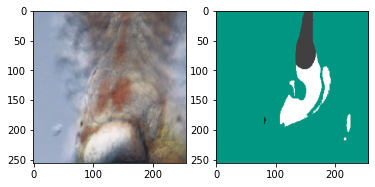

Epoch 3/250
250/250 [==============================] - ETA: 0s - loss: 0.6098 - accuracy: 0.8348
Epoch 00003: val_loss improved from 0.91337 to 0.76172, saving model to ./missing_labels_test/0.0\weights_custom_loss.hdf5
250/250 [==============================] - 222s 886ms/step - loss: 0.6098 - accuracy: 0.8348 - val_loss: 0.7617 - val_accuracy: 0.8585


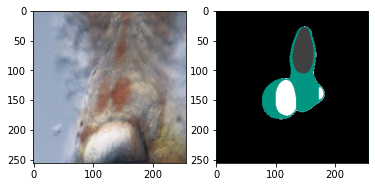

Epoch 4/250
250/250 [==============================] - ETA: 0s - loss: 0.4817 - accuracy: 0.9075
Epoch 00004: val_loss did not improve from 0.76172
250/250 [==============================] - 221s 886ms/step - loss: 0.4817 - accuracy: 0.9075 - val_loss: 0.7669 - val_accuracy: 0.8560


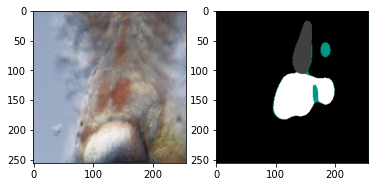

Epoch 5/250
250/250 [==============================] - ETA: 0s - loss: 0.3905 - accuracy: 0.9460
Epoch 00005: val_loss improved from 0.76172 to 0.75302, saving model to ./missing_labels_test/0.0\weights_custom_loss.hdf5
250/250 [==============================] - 222s 887ms/step - loss: 0.3905 - accuracy: 0.9460 - val_loss: 0.7530 - val_accuracy: 0.8915


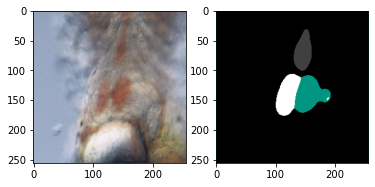

Epoch 6/250
250/250 [==============================] - ETA: 0s - loss: 0.3280 - accuracy: 0.9593
Epoch 00006: val_loss improved from 0.75302 to 0.74917, saving model to ./missing_labels_test/0.0\weights_custom_loss.hdf5
250/250 [==============================] - 223s 890ms/step - loss: 0.3280 - accuracy: 0.9593 - val_loss: 0.7492 - val_accuracy: 0.9019


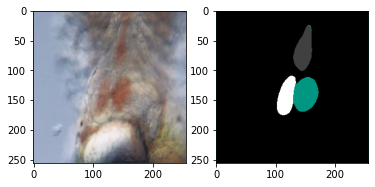

Epoch 7/250
250/250 [==============================] - ETA: 0s - loss: 0.2819 - accuracy: 0.9654
Epoch 00007: val_loss did not improve from 0.74917
250/250 [==============================] - 221s 884ms/step - loss: 0.2819 - accuracy: 0.9654 - val_loss: 0.7498 - val_accuracy: 0.9075


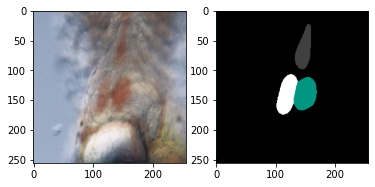

Epoch 8/250
250/250 [==============================] - ETA: 0s - loss: 0.2479 - accuracy: 0.9713
Epoch 00008: val_loss improved from 0.74917 to 0.74604, saving model to ./missing_labels_test/0.0\weights_custom_loss.hdf5
250/250 [==============================] - 222s 886ms/step - loss: 0.2479 - accuracy: 0.9713 - val_loss: 0.7460 - val_accuracy: 0.9163


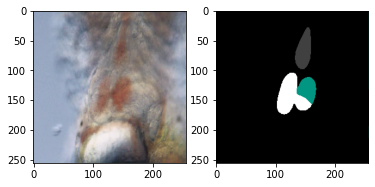

Epoch 9/250
250/250 [==============================] - ETA: 0s - loss: 0.2076 - accuracy: 0.9794
Epoch 00009: val_loss did not improve from 0.74604
250/250 [==============================] - 221s 884ms/step - loss: 0.2076 - accuracy: 0.9794 - val_loss: 0.7499 - val_accuracy: 0.9184


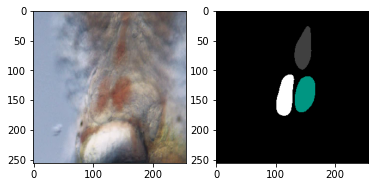

Epoch 10/250
250/250 [==============================] - ETA: 0s - loss: 0.1732 - accuracy: 0.9834
Epoch 00010: val_loss did not improve from 0.74604
250/250 [==============================] - 221s 885ms/step - loss: 0.1732 - accuracy: 0.9834 - val_loss: 0.7488 - val_accuracy: 0.9255


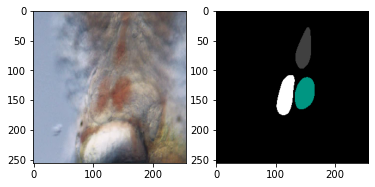

Epoch 11/250
250/250 [==============================] - ETA: 0s - loss: 0.1568 - accuracy: 0.9844
Epoch 00011: val_loss did not improve from 0.74604
250/250 [==============================] - 222s 888ms/step - loss: 0.1568 - accuracy: 0.9844 - val_loss: 0.7498 - val_accuracy: 0.9221


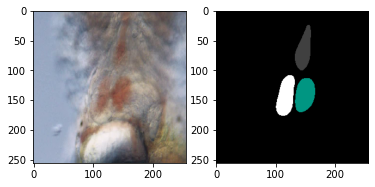

Epoch 12/250
250/250 [==============================] - ETA: 0s - loss: 0.1534 - accuracy: 0.9839
Epoch 00012: val_loss did not improve from 0.74604
250/250 [==============================] - 221s 884ms/step - loss: 0.1534 - accuracy: 0.9839 - val_loss: 0.7507 - val_accuracy: 0.9236


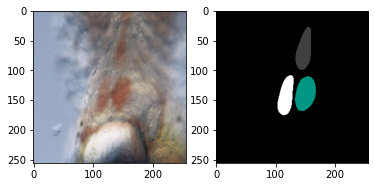

Epoch 13/250
250/250 [==============================] - ETA: 0s - loss: 0.1432 - accuracy: 0.9848
Epoch 00013: val_loss did not improve from 0.74604
250/250 [==============================] - 221s 883ms/step - loss: 0.1432 - accuracy: 0.9848 - val_loss: 0.7499 - val_accuracy: 0.9252


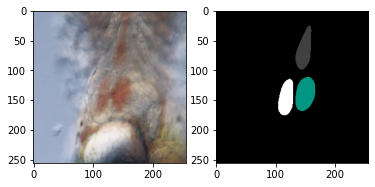

Epoch 14/250
250/250 [==============================] - ETA: 0s - loss: 0.1334 - accuracy: 0.9855
Epoch 00014: val_loss did not improve from 0.74604
250/250 [==============================] - 222s 890ms/step - loss: 0.1334 - accuracy: 0.9855 - val_loss: 0.7510 - val_accuracy: 0.9242


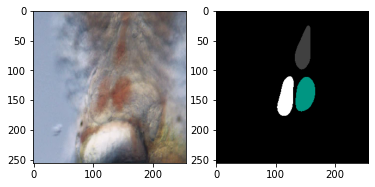

Epoch 15/250
250/250 [==============================] - ETA: 0s - loss: 0.1311 - accuracy: 0.9854
Epoch 00015: val_loss did not improve from 0.74604
250/250 [==============================] - 221s 884ms/step - loss: 0.1311 - accuracy: 0.9854 - val_loss: 0.7494 - val_accuracy: 0.9252


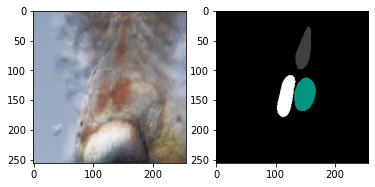

Epoch 16/250
250/250 [==============================] - ETA: 0s - loss: 0.1320 - accuracy: 0.9851
Epoch 00016: val_loss did not improve from 0.74604
250/250 [==============================] - 222s 887ms/step - loss: 0.1320 - accuracy: 0.9851 - val_loss: 0.7507 - val_accuracy: 0.9247


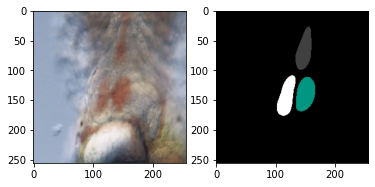

Epoch 17/250
250/250 [==============================] - ETA: 0s - loss: 0.1196 - accuracy: 0.9864
Epoch 00017: val_loss did not improve from 0.74604
250/250 [==============================] - 221s 883ms/step - loss: 0.1196 - accuracy: 0.9864 - val_loss: 0.7490 - val_accuracy: 0.9212


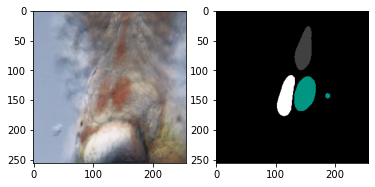

Epoch 18/250
250/250 [==============================] - ETA: 0s - loss: 0.1205 - accuracy: 0.9861
Epoch 00018: val_loss did not improve from 0.74604
250/250 [==============================] - 221s 884ms/step - loss: 0.1205 - accuracy: 0.9861 - val_loss: 0.7488 - val_accuracy: 0.9238


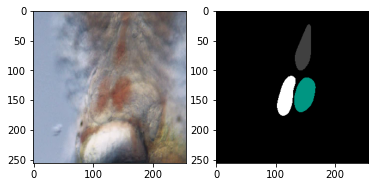

Epoch 19/250
250/250 [==============================] - ETA: 0s - loss: 0.1115 - accuracy: 0.9871
Epoch 00019: val_loss did not improve from 0.74604
250/250 [==============================] - 221s 883ms/step - loss: 0.1115 - accuracy: 0.9871 - val_loss: 0.7483 - val_accuracy: 0.9257


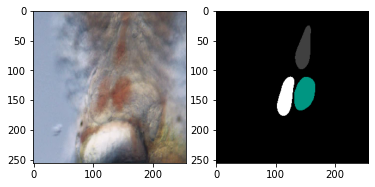

Epoch 20/250
250/250 [==============================] - ETA: 0s - loss: 0.1089 - accuracy: 0.9874
Epoch 00020: val_loss did not improve from 0.74604
250/250 [==============================] - 221s 885ms/step - loss: 0.1089 - accuracy: 0.9874 - val_loss: 0.7490 - val_accuracy: 0.9254


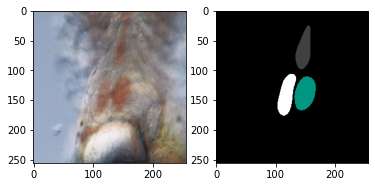

Epoch 21/250
250/250 [==============================] - ETA: 0s - loss: 0.1070 - accuracy: 0.9875
Epoch 00021: val_loss did not improve from 0.74604
250/250 [==============================] - 222s 887ms/step - loss: 0.1070 - accuracy: 0.9875 - val_loss: 0.7492 - val_accuracy: 0.9245


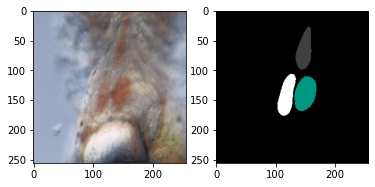

Epoch 22/250
250/250 [==============================] - ETA: 0s - loss: 0.1062 - accuracy: 0.9875
Epoch 00022: val_loss did not improve from 0.74604
250/250 [==============================] - 221s 883ms/step - loss: 0.1062 - accuracy: 0.9875 - val_loss: 0.7494 - val_accuracy: 0.9256


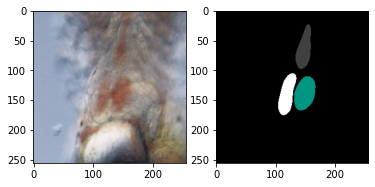

Epoch 23/250
250/250 [==============================] - ETA: 0s - loss: 0.1058 - accuracy: 0.9875
Epoch 00023: val_loss did not improve from 0.74604
250/250 [==============================] - 221s 882ms/step - loss: 0.1058 - accuracy: 0.9875 - val_loss: 0.7477 - val_accuracy: 0.9236


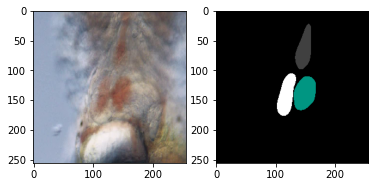

Epoch 24/250
250/250 [==============================] - ETA: 0s - loss: 0.1053 - accuracy: 0.9877
Epoch 00024: val_loss did not improve from 0.74604
250/250 [==============================] - 220s 882ms/step - loss: 0.1053 - accuracy: 0.9877 - val_loss: 0.7499 - val_accuracy: 0.9239


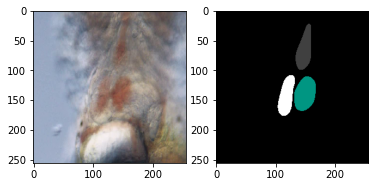

Epoch 25/250
250/250 [==============================] - ETA: 0s - loss: 0.1033 - accuracy: 0.9878
Epoch 00025: val_loss did not improve from 0.74604
250/250 [==============================] - 221s 885ms/step - loss: 0.1033 - accuracy: 0.9878 - val_loss: 0.7509 - val_accuracy: 0.9261


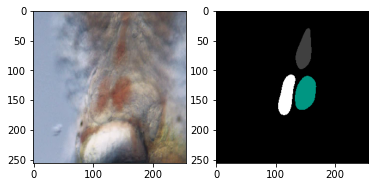

Epoch 26/250
250/250 [==============================] - ETA: 0s - loss: 0.1031 - accuracy: 0.9877
Epoch 00026: val_loss did not improve from 0.74604
250/250 [==============================] - 221s 882ms/step - loss: 0.1031 - accuracy: 0.9877 - val_loss: 0.7507 - val_accuracy: 0.9252


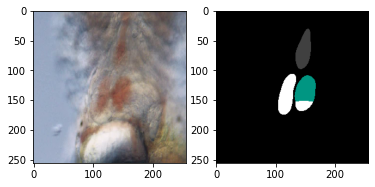

Epoch 27/250
250/250 [==============================] - ETA: 0s - loss: 0.1022 - accuracy: 0.9878
Epoch 00027: val_loss did not improve from 0.74604
250/250 [==============================] - 221s 885ms/step - loss: 0.1022 - accuracy: 0.9878 - val_loss: 0.7513 - val_accuracy: 0.9249


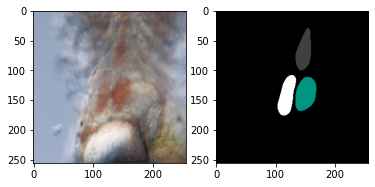

Epoch 28/250
250/250 [==============================] - ETA: 0s - loss: 0.1061 - accuracy: 0.9872
Epoch 00028: val_loss did not improve from 0.74604
250/250 [==============================] - 221s 884ms/step - loss: 0.1061 - accuracy: 0.9872 - val_loss: 0.7500 - val_accuracy: 0.9267


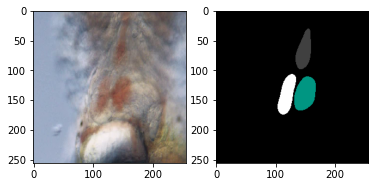

Epoch 29/250
250/250 [==============================] - ETA: 0s - loss: 0.0989 - accuracy: 0.9881
Epoch 00029: val_loss did not improve from 0.74604
250/250 [==============================] - 221s 886ms/step - loss: 0.0989 - accuracy: 0.9881 - val_loss: 0.7495 - val_accuracy: 0.9267


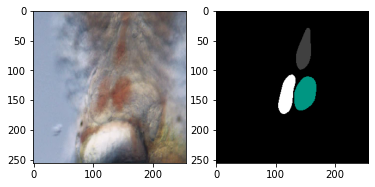

Epoch 30/250
250/250 [==============================] - ETA: 0s - loss: 0.0973 - accuracy: 0.9882
Epoch 00030: val_loss did not improve from 0.74604
250/250 [==============================] - 221s 885ms/step - loss: 0.0973 - accuracy: 0.9882 - val_loss: 0.7503 - val_accuracy: 0.9261


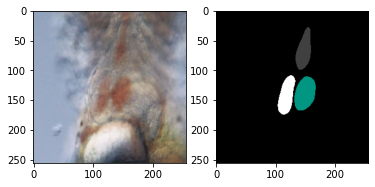

Epoch 31/250
250/250 [==============================] - ETA: 0s - loss: 0.0970 - accuracy: 0.9883
Epoch 00031: val_loss did not improve from 0.74604
250/250 [==============================] - 221s 885ms/step - loss: 0.0970 - accuracy: 0.9883 - val_loss: 0.7501 - val_accuracy: 0.9260


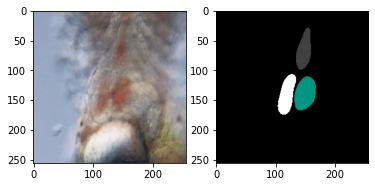

Epoch 32/250
250/250 [==============================] - ETA: 0s - loss: 0.0957 - accuracy: 0.9884
Epoch 00032: val_loss did not improve from 0.74604
250/250 [==============================] - 221s 885ms/step - loss: 0.0957 - accuracy: 0.9884 - val_loss: 0.7494 - val_accuracy: 0.9263


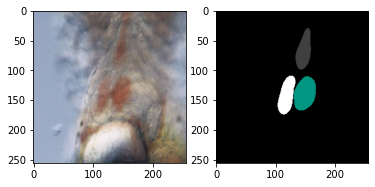

Epoch 33/250
250/250 [==============================] - ETA: 0s - loss: 0.0955 - accuracy: 0.9885
Epoch 00033: val_loss did not improve from 0.74604
250/250 [==============================] - 221s 884ms/step - loss: 0.0955 - accuracy: 0.9885 - val_loss: 0.7500 - val_accuracy: 0.9257


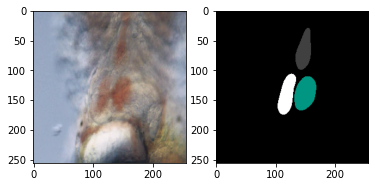

Epoch 34/250
250/250 [==============================] - ETA: 0s - loss: 0.0951 - accuracy: 0.9884
Epoch 00034: val_loss did not improve from 0.74604
250/250 [==============================] - 221s 886ms/step - loss: 0.0951 - accuracy: 0.9884 - val_loss: 0.7498 - val_accuracy: 0.9258


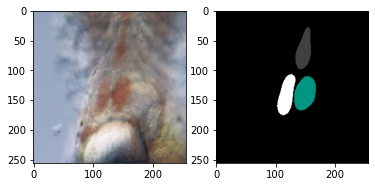

Epoch 35/250
250/250 [==============================] - ETA: 0s - loss: 0.0949 - accuracy: 0.9884
Epoch 00035: val_loss did not improve from 0.74604
250/250 [==============================] - 221s 886ms/step - loss: 0.0949 - accuracy: 0.9884 - val_loss: 0.7503 - val_accuracy: 0.9272


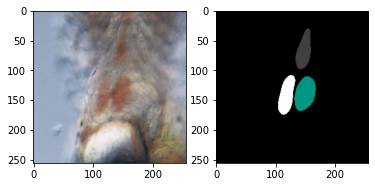

Epoch 36/250
250/250 [==============================] - ETA: 0s - loss: 0.0939 - accuracy: 0.9885
Epoch 00036: val_loss did not improve from 0.74604
250/250 [==============================] - 221s 883ms/step - loss: 0.0939 - accuracy: 0.9885 - val_loss: 0.7502 - val_accuracy: 0.9263


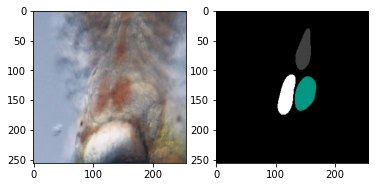

Epoch 37/250
250/250 [==============================] - ETA: 0s - loss: 0.0935 - accuracy: 0.9886
Epoch 00037: val_loss did not improve from 0.74604
250/250 [==============================] - 221s 886ms/step - loss: 0.0935 - accuracy: 0.9886 - val_loss: 0.7497 - val_accuracy: 0.9263


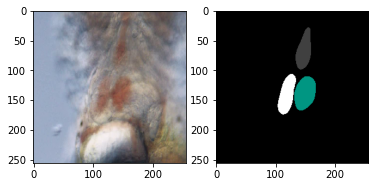

Epoch 38/250
250/250 [==============================] - ETA: 0s - loss: 0.0935 - accuracy: 0.9886
Epoch 00038: val_loss did not improve from 0.74604
250/250 [==============================] - 221s 885ms/step - loss: 0.0935 - accuracy: 0.9886 - val_loss: 0.7500 - val_accuracy: 0.9268
Epoch 00038: early stopping
---------------------
Missing Ratio: 0.300000
---------------------
Found 565 images belonging to 1 classes.
Found 565 masks containing 3 classes.
Removing 30% of masks of the following class(es): ['ventral_mask_atrium', 'ventral_mask_bulbus', 'ventral_mask_heart']


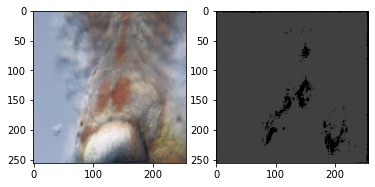

Epoch 1/250
250/250 [==============================] - ETA: 0s - loss: 0.7525 - accuracy: 0.6541
Epoch 00001: val_loss improved from inf to 0.93821, saving model to ./missing_labels_test/0.3\weights_custom_loss.hdf5
250/250 [==============================] - 224s 894ms/step - loss: 0.7525 - accuracy: 0.6541 - val_loss: 0.9382 - val_accuracy: 0.0246


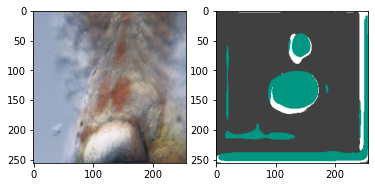

Epoch 2/250
250/250 [==============================] - ETA: 0s - loss: 0.6650 - accuracy: 0.7854
Epoch 00002: val_loss improved from 0.93821 to 0.80782, saving model to ./missing_labels_test/0.3\weights_custom_loss.hdf5
250/250 [==============================] - 222s 888ms/step - loss: 0.6650 - accuracy: 0.7854 - val_loss: 0.8078 - val_accuracy: 0.7900


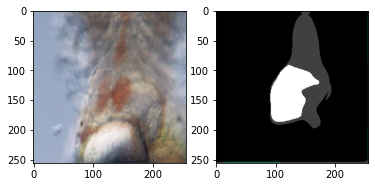

Epoch 3/250
250/250 [==============================] - ETA: 0s - loss: 0.5758 - accuracy: 0.8500
Epoch 00003: val_loss improved from 0.80782 to 0.80019, saving model to ./missing_labels_test/0.3\weights_custom_loss.hdf5
250/250 [==============================] - 222s 890ms/step - loss: 0.5758 - accuracy: 0.8500 - val_loss: 0.8002 - val_accuracy: 0.8433


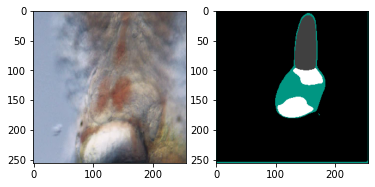

Epoch 4/250
250/250 [==============================] - ETA: 0s - loss: 0.4756 - accuracy: 0.8858
Epoch 00004: val_loss improved from 0.80019 to 0.75415, saving model to ./missing_labels_test/0.3\weights_custom_loss.hdf5
250/250 [==============================] - 222s 890ms/step - loss: 0.4756 - accuracy: 0.8858 - val_loss: 0.7541 - val_accuracy: 0.8551


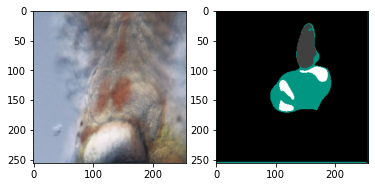

Epoch 5/250
250/250 [==============================] - ETA: 0s - loss: 0.4037 - accuracy: 0.9100
Epoch 00005: val_loss improved from 0.75415 to 0.74538, saving model to ./missing_labels_test/0.3\weights_custom_loss.hdf5
250/250 [==============================] - 222s 887ms/step - loss: 0.4037 - accuracy: 0.9100 - val_loss: 0.7454 - val_accuracy: 0.8774


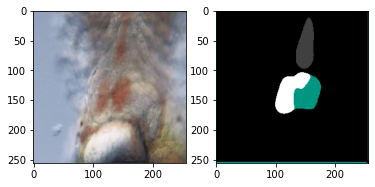

Epoch 6/250
250/250 [==============================] - ETA: 0s - loss: 0.3461 - accuracy: 0.9228
Epoch 00006: val_loss did not improve from 0.74538
250/250 [==============================] - 222s 889ms/step - loss: 0.3461 - accuracy: 0.9228 - val_loss: 0.7511 - val_accuracy: 0.8844


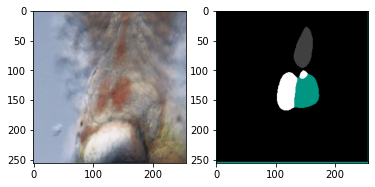

Epoch 7/250
250/250 [==============================] - ETA: 0s - loss: 0.3050 - accuracy: 0.9311
Epoch 00007: val_loss did not improve from 0.74538
250/250 [==============================] - 222s 886ms/step - loss: 0.3050 - accuracy: 0.9311 - val_loss: 0.7535 - val_accuracy: 0.8852


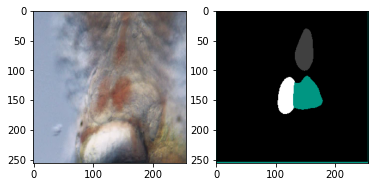

Epoch 8/250
250/250 [==============================] - ETA: 0s - loss: 0.2719 - accuracy: 0.9361
Epoch 00008: val_loss did not improve from 0.74538
250/250 [==============================] - 221s 886ms/step - loss: 0.2719 - accuracy: 0.9361 - val_loss: 0.7497 - val_accuracy: 0.8853


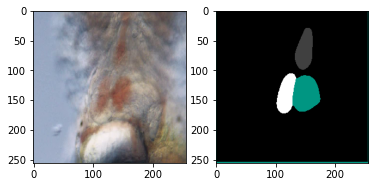

Epoch 9/250
250/250 [==============================] - ETA: 0s - loss: 0.2525 - accuracy: 0.9390
Epoch 00009: val_loss improved from 0.74538 to 0.74500, saving model to ./missing_labels_test/0.3\weights_custom_loss.hdf5
250/250 [==============================] - 222s 888ms/step - loss: 0.2525 - accuracy: 0.9390 - val_loss: 0.7450 - val_accuracy: 0.8932


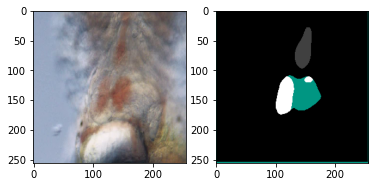

Epoch 10/250
250/250 [==============================] - ETA: 0s - loss: 0.2404 - accuracy: 0.9408
Epoch 00010: val_loss did not improve from 0.74500
250/250 [==============================] - 221s 885ms/step - loss: 0.2404 - accuracy: 0.9408 - val_loss: 0.7472 - val_accuracy: 0.9046


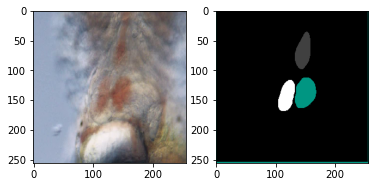

Epoch 11/250
250/250 [==============================] - ETA: 0s - loss: 0.2316 - accuracy: 0.9419
Epoch 00011: val_loss did not improve from 0.74500
250/250 [==============================] - 222s 887ms/step - loss: 0.2316 - accuracy: 0.9419 - val_loss: 0.7550 - val_accuracy: 0.9016


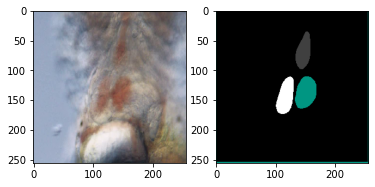

Epoch 12/250
250/250 [==============================] - ETA: 0s - loss: 0.2200 - accuracy: 0.9433
Epoch 00012: val_loss did not improve from 0.74500
250/250 [==============================] - 222s 887ms/step - loss: 0.2200 - accuracy: 0.9433 - val_loss: 0.7503 - val_accuracy: 0.9002


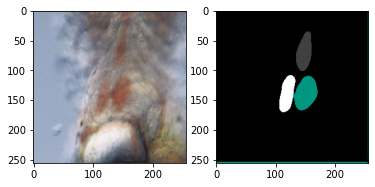

Epoch 13/250
250/250 [==============================] - ETA: 0s - loss: 0.2125 - accuracy: 0.9438
Epoch 00013: val_loss did not improve from 0.74500
250/250 [==============================] - 221s 884ms/step - loss: 0.2125 - accuracy: 0.9438 - val_loss: 0.7475 - val_accuracy: 0.8967


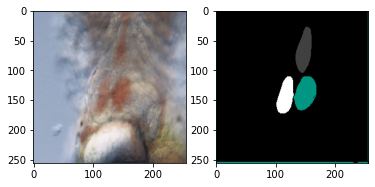

Epoch 14/250
250/250 [==============================] - ETA: 0s - loss: 0.2007 - accuracy: 0.9522
Epoch 00014: val_loss did not improve from 0.74500
250/250 [==============================] - 221s 885ms/step - loss: 0.2007 - accuracy: 0.9522 - val_loss: 0.7481 - val_accuracy: 0.9222


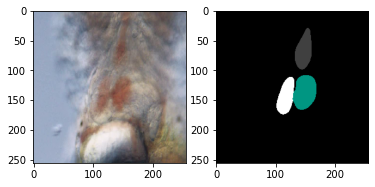

Epoch 15/250
250/250 [==============================] - ETA: 0s - loss: 0.1443 - accuracy: 0.9691
Epoch 00015: val_loss did not improve from 0.74500
250/250 [==============================] - 221s 885ms/step - loss: 0.1443 - accuracy: 0.9691 - val_loss: 0.7504 - val_accuracy: 0.9264


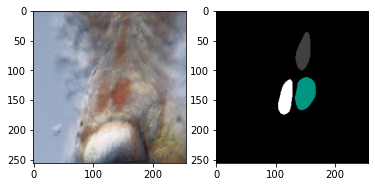

Epoch 16/250
250/250 [==============================] - ETA: 0s - loss: 0.1353 - accuracy: 0.9699
Epoch 00016: val_loss did not improve from 0.74500
250/250 [==============================] - 222s 888ms/step - loss: 0.1353 - accuracy: 0.9699 - val_loss: 0.7483 - val_accuracy: 0.9263


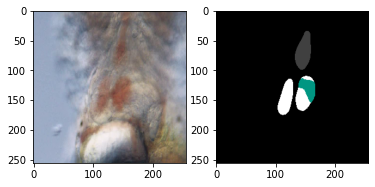

Epoch 17/250
250/250 [==============================] - ETA: 0s - loss: 0.1354 - accuracy: 0.9697
Epoch 00017: val_loss did not improve from 0.74500
250/250 [==============================] - 221s 885ms/step - loss: 0.1354 - accuracy: 0.9697 - val_loss: 0.7510 - val_accuracy: 0.9235


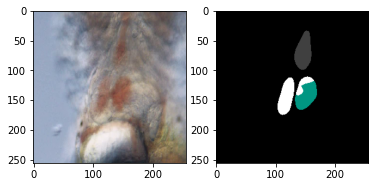

Epoch 18/250
250/250 [==============================] - ETA: 0s - loss: 0.1220 - accuracy: 0.9709
Epoch 00018: val_loss did not improve from 0.74500
250/250 [==============================] - 221s 885ms/step - loss: 0.1220 - accuracy: 0.9709 - val_loss: 0.7484 - val_accuracy: 0.9260


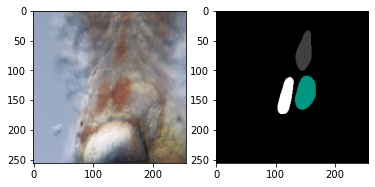

Epoch 19/250
250/250 [==============================] - ETA: 0s - loss: 0.1215 - accuracy: 0.9709
Epoch 00019: val_loss did not improve from 0.74500
250/250 [==============================] - 222s 887ms/step - loss: 0.1215 - accuracy: 0.9709 - val_loss: 0.7511 - val_accuracy: 0.9224


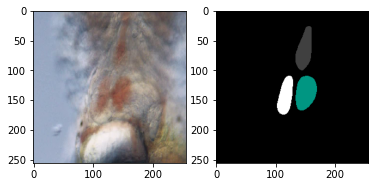

Epoch 20/250
250/250 [==============================] - ETA: 0s - loss: 0.1115 - accuracy: 0.9717
Epoch 00020: val_loss did not improve from 0.74500
250/250 [==============================] - 221s 885ms/step - loss: 0.1115 - accuracy: 0.9717 - val_loss: 0.7505 - val_accuracy: 0.9253


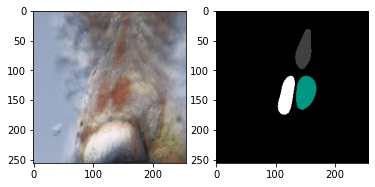

Epoch 21/250
250/250 [==============================] - ETA: 0s - loss: 0.1108 - accuracy: 0.9724
Epoch 00021: val_loss did not improve from 0.74500
250/250 [==============================] - 223s 890ms/step - loss: 0.1108 - accuracy: 0.9724 - val_loss: 0.7477 - val_accuracy: 0.9257


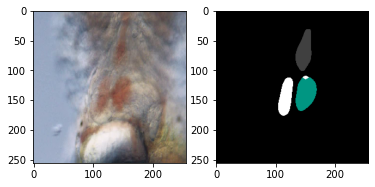

Epoch 22/250
250/250 [==============================] - ETA: 0s - loss: 0.1100 - accuracy: 0.9719
Epoch 00022: val_loss did not improve from 0.74500
250/250 [==============================] - 221s 886ms/step - loss: 0.1100 - accuracy: 0.9719 - val_loss: 0.7503 - val_accuracy: 0.9254


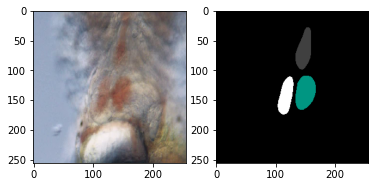

Epoch 23/250
250/250 [==============================] - ETA: 0s - loss: 0.1061 - accuracy: 0.9717
Epoch 00023: val_loss did not improve from 0.74500
250/250 [==============================] - 222s 886ms/step - loss: 0.1061 - accuracy: 0.9717 - val_loss: 0.7506 - val_accuracy: 0.9244


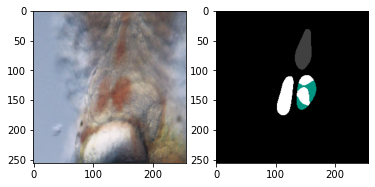

Epoch 24/250
250/250 [==============================] - ETA: 0s - loss: 0.1051 - accuracy: 0.9712
Epoch 00024: val_loss did not improve from 0.74500
250/250 [==============================] - 222s 886ms/step - loss: 0.1051 - accuracy: 0.9712 - val_loss: 0.7493 - val_accuracy: 0.9246


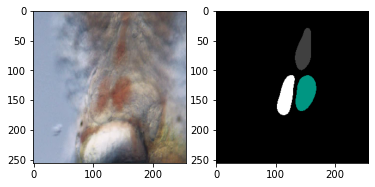

Epoch 25/250
250/250 [==============================] - ETA: 0s - loss: 0.1034 - accuracy: 0.9728
Epoch 00025: val_loss did not improve from 0.74500
250/250 [==============================] - 222s 886ms/step - loss: 0.1034 - accuracy: 0.9728 - val_loss: 0.7500 - val_accuracy: 0.9262


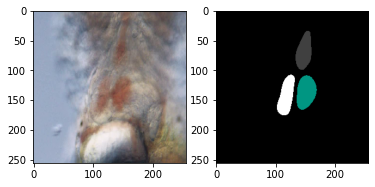

Epoch 26/250
250/250 [==============================] - ETA: 0s - loss: 0.1037 - accuracy: 0.9718
Epoch 00026: val_loss did not improve from 0.74500
250/250 [==============================] - 222s 887ms/step - loss: 0.1037 - accuracy: 0.9718 - val_loss: 0.7489 - val_accuracy: 0.9265


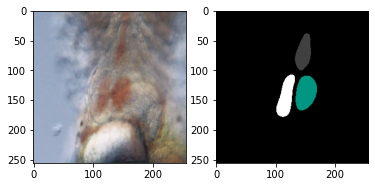

Epoch 27/250
250/250 [==============================] - ETA: 0s - loss: 0.1021 - accuracy: 0.9716
Epoch 00027: val_loss did not improve from 0.74500
250/250 [==============================] - 222s 888ms/step - loss: 0.1021 - accuracy: 0.9716 - val_loss: 0.7463 - val_accuracy: 0.9264


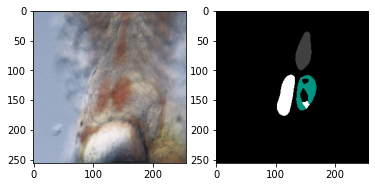

Epoch 28/250
250/250 [==============================] - ETA: 0s - loss: 0.1004 - accuracy: 0.9723
Epoch 00028: val_loss did not improve from 0.74500
250/250 [==============================] - 222s 887ms/step - loss: 0.1004 - accuracy: 0.9723 - val_loss: 0.7494 - val_accuracy: 0.9268


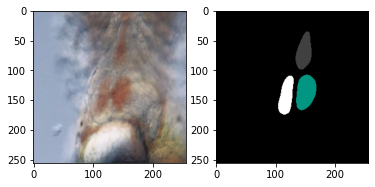

Epoch 29/250
250/250 [==============================] - ETA: 0s - loss: 0.1020 - accuracy: 0.9720
Epoch 00029: val_loss did not improve from 0.74500
250/250 [==============================] - 222s 886ms/step - loss: 0.1020 - accuracy: 0.9720 - val_loss: 0.7495 - val_accuracy: 0.9265


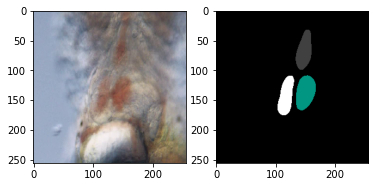

Epoch 30/250
250/250 [==============================] - ETA: 0s - loss: 0.0968 - accuracy: 0.9725
Epoch 00030: val_loss did not improve from 0.74500
250/250 [==============================] - 221s 885ms/step - loss: 0.0968 - accuracy: 0.9725 - val_loss: 0.7505 - val_accuracy: 0.9270


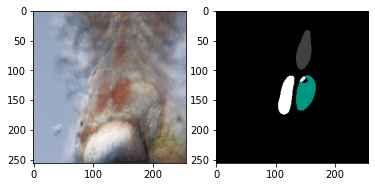

Epoch 31/250
250/250 [==============================] - ETA: 0s - loss: 0.0959 - accuracy: 0.9724
Epoch 00031: val_loss did not improve from 0.74500
250/250 [==============================] - 222s 888ms/step - loss: 0.0959 - accuracy: 0.9724 - val_loss: 0.7496 - val_accuracy: 0.9256


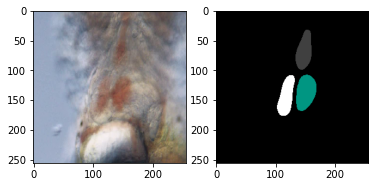

Epoch 32/250
250/250 [==============================] - ETA: 0s - loss: 0.0943 - accuracy: 0.9727
Epoch 00032: val_loss did not improve from 0.74500
250/250 [==============================] - 222s 889ms/step - loss: 0.0943 - accuracy: 0.9727 - val_loss: 0.7499 - val_accuracy: 0.9275


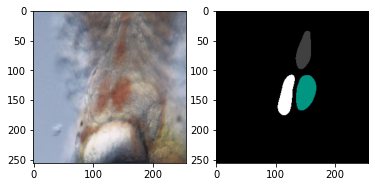

Epoch 33/250
250/250 [==============================] - ETA: 0s - loss: 0.0951 - accuracy: 0.9727
Epoch 00033: val_loss did not improve from 0.74500
250/250 [==============================] - 221s 885ms/step - loss: 0.0951 - accuracy: 0.9727 - val_loss: 0.7496 - val_accuracy: 0.9269


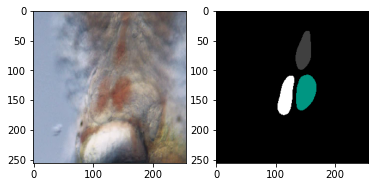

Epoch 34/250
250/250 [==============================] - ETA: 0s - loss: 0.0944 - accuracy: 0.9729
Epoch 00034: val_loss did not improve from 0.74500
250/250 [==============================] - 221s 884ms/step - loss: 0.0944 - accuracy: 0.9729 - val_loss: 0.7504 - val_accuracy: 0.9255


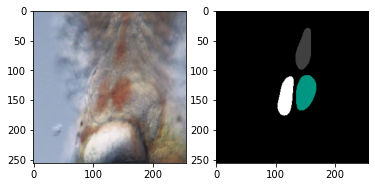

Epoch 35/250
250/250 [==============================] - ETA: 0s - loss: 0.0941 - accuracy: 0.9732
Epoch 00035: val_loss did not improve from 0.74500
250/250 [==============================] - 222s 886ms/step - loss: 0.0941 - accuracy: 0.9732 - val_loss: 0.7494 - val_accuracy: 0.9267


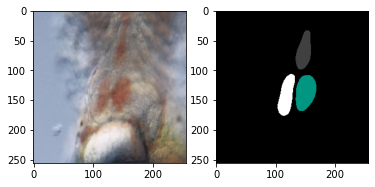

Epoch 36/250
250/250 [==============================] - ETA: 0s - loss: 0.0926 - accuracy: 0.9727
Epoch 00036: val_loss did not improve from 0.74500
250/250 [==============================] - 225s 900ms/step - loss: 0.0926 - accuracy: 0.9727 - val_loss: 0.7492 - val_accuracy: 0.9276


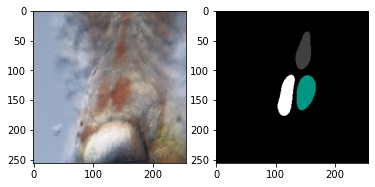

Epoch 37/250
250/250 [==============================] - ETA: 0s - loss: 0.0943 - accuracy: 0.9726
Epoch 00037: val_loss did not improve from 0.74500
250/250 [==============================] - 222s 888ms/step - loss: 0.0943 - accuracy: 0.9726 - val_loss: 0.7498 - val_accuracy: 0.9271


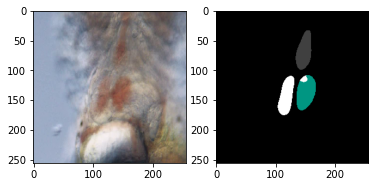

Epoch 38/250
250/250 [==============================] - ETA: 0s - loss: 0.0929 - accuracy: 0.9730
Epoch 00038: val_loss did not improve from 0.74500
250/250 [==============================] - 222s 886ms/step - loss: 0.0929 - accuracy: 0.9730 - val_loss: 0.7497 - val_accuracy: 0.9260


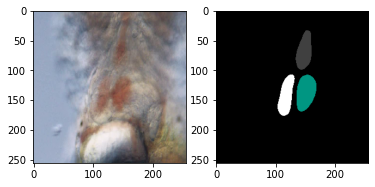

Epoch 39/250
250/250 [==============================] - ETA: 0s - loss: 0.0912 - accuracy: 0.9735
Epoch 00039: val_loss did not improve from 0.74500
250/250 [==============================] - 222s 887ms/step - loss: 0.0912 - accuracy: 0.9735 - val_loss: 0.7502 - val_accuracy: 0.9272
Epoch 00039: early stopping
---------------------
Missing Ratio: 0.700000
---------------------
Found 565 images belonging to 1 classes.
Found 565 masks containing 3 classes.
Removing 70% of masks of the following class(es): ['ventral_mask_atrium', 'ventral_mask_bulbus', 'ventral_mask_heart']


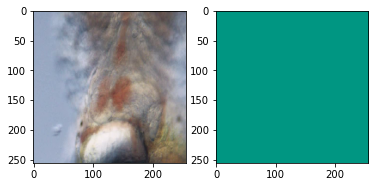

Epoch 1/250
250/250 [==============================] - ETA: 0s - loss: 0.5899 - accuracy: 0.7067
Epoch 00001: val_loss improved from inf to 0.80648, saving model to ./missing_labels_test/0.7\weights_custom_loss.hdf5
250/250 [==============================] - 225s 901ms/step - loss: 0.5899 - accuracy: 0.7067 - val_loss: 0.8065 - val_accuracy: 0.6578


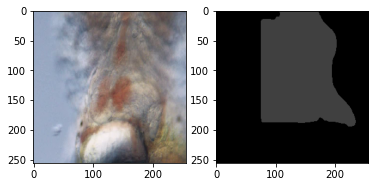

Epoch 2/250
250/250 [==============================] - ETA: 0s - loss: 0.5052 - accuracy: 0.7966
Epoch 00002: val_loss improved from 0.80648 to 0.76453, saving model to ./missing_labels_test/0.7\weights_custom_loss.hdf5
250/250 [==============================] - 224s 897ms/step - loss: 0.5052 - accuracy: 0.7966 - val_loss: 0.7645 - val_accuracy: 0.8073


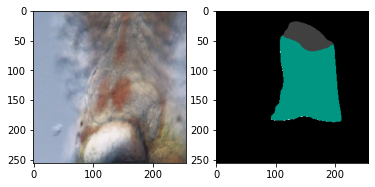

Epoch 3/250
250/250 [==============================] - ETA: 0s - loss: 0.4407 - accuracy: 0.8441
Epoch 00003: val_loss improved from 0.76453 to 0.74465, saving model to ./missing_labels_test/0.7\weights_custom_loss.hdf5
250/250 [==============================] - 225s 898ms/step - loss: 0.4407 - accuracy: 0.8441 - val_loss: 0.7447 - val_accuracy: 0.8190


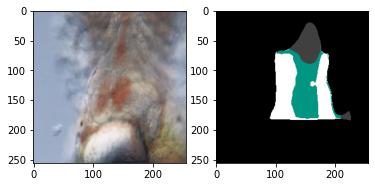

Epoch 4/250
250/250 [==============================] - ETA: 0s - loss: 0.3880 - accuracy: 0.8661
Epoch 00004: val_loss did not improve from 0.74465
250/250 [==============================] - 223s 894ms/step - loss: 0.3880 - accuracy: 0.8661 - val_loss: 0.7468 - val_accuracy: 0.8686


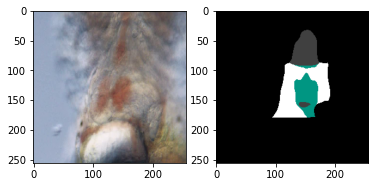

Epoch 5/250
250/250 [==============================] - ETA: 0s - loss: 0.3438 - accuracy: 0.8856
Epoch 00005: val_loss improved from 0.74465 to 0.69424, saving model to ./missing_labels_test/0.7\weights_custom_loss.hdf5
250/250 [==============================] - 223s 894ms/step - loss: 0.3438 - accuracy: 0.8856 - val_loss: 0.6942 - val_accuracy: 0.8895


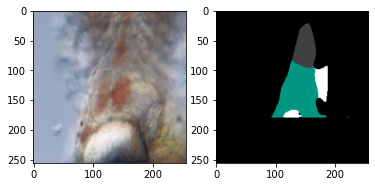

Epoch 6/250
250/250 [==============================] - ETA: 0s - loss: 0.2997 - accuracy: 0.9026
Epoch 00006: val_loss did not improve from 0.69424
250/250 [==============================] - 224s 896ms/step - loss: 0.2997 - accuracy: 0.9026 - val_loss: 0.7423 - val_accuracy: 0.8774


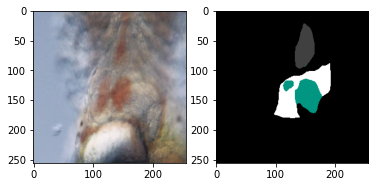

Epoch 7/250
250/250 [==============================] - ETA: 0s - loss: 0.2558 - accuracy: 0.9203
Epoch 00007: val_loss did not improve from 0.69424
250/250 [==============================] - 223s 894ms/step - loss: 0.2558 - accuracy: 0.9203 - val_loss: 0.7458 - val_accuracy: 0.9017


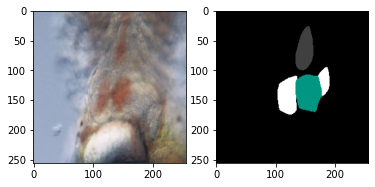

Epoch 8/250
250/250 [==============================] - ETA: 0s - loss: 0.2150 - accuracy: 0.9333
Epoch 00008: val_loss did not improve from 0.69424
250/250 [==============================] - 224s 896ms/step - loss: 0.2150 - accuracy: 0.9333 - val_loss: 0.7417 - val_accuracy: 0.9172


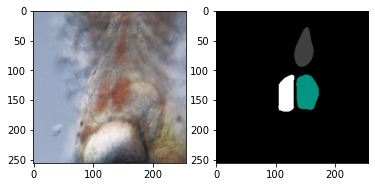

Epoch 9/250
250/250 [==============================] - ETA: 0s - loss: 0.1901 - accuracy: 0.9389
Epoch 00009: val_loss did not improve from 0.69424
250/250 [==============================] - 224s 894ms/step - loss: 0.1901 - accuracy: 0.9389 - val_loss: 0.7511 - val_accuracy: 0.9151


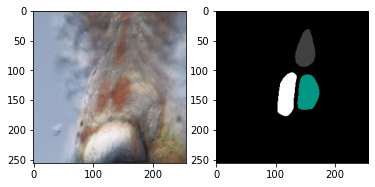

Epoch 10/250
250/250 [==============================] - ETA: 0s - loss: 0.1650 - accuracy: 0.9428
Epoch 00010: val_loss did not improve from 0.69424
250/250 [==============================] - 223s 893ms/step - loss: 0.1650 - accuracy: 0.9428 - val_loss: 0.7481 - val_accuracy: 0.9240


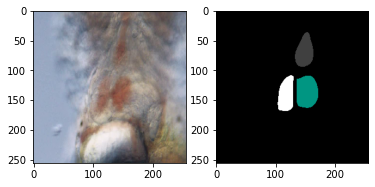

Epoch 11/250
250/250 [==============================] - ETA: 0s - loss: 0.1457 - accuracy: 0.9469
Epoch 00011: val_loss did not improve from 0.69424
250/250 [==============================] - 224s 896ms/step - loss: 0.1457 - accuracy: 0.9469 - val_loss: 0.7497 - val_accuracy: 0.9189


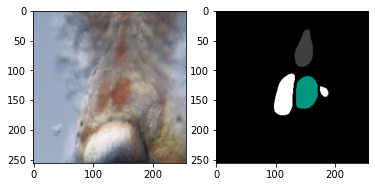

Epoch 12/250
250/250 [==============================] - ETA: 0s - loss: 0.1369 - accuracy: 0.9483
Epoch 00012: val_loss did not improve from 0.69424
250/250 [==============================] - 224s 895ms/step - loss: 0.1369 - accuracy: 0.9483 - val_loss: 0.7513 - val_accuracy: 0.9230


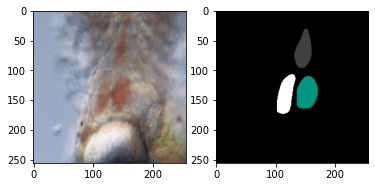

Epoch 13/250
250/250 [==============================] - ETA: 0s - loss: 0.1300 - accuracy: 0.9490
Epoch 00013: val_loss did not improve from 0.69424
250/250 [==============================] - 224s 895ms/step - loss: 0.1300 - accuracy: 0.9490 - val_loss: 0.7527 - val_accuracy: 0.9217


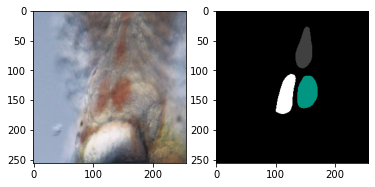

Epoch 14/250
250/250 [==============================] - ETA: 0s - loss: 0.1180 - accuracy: 0.9494
Epoch 00014: val_loss did not improve from 0.69424
250/250 [==============================] - 223s 894ms/step - loss: 0.1180 - accuracy: 0.9494 - val_loss: 0.7515 - val_accuracy: 0.9234


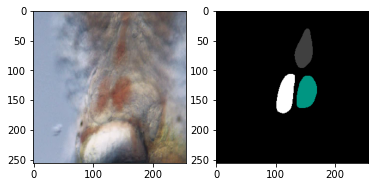

Epoch 15/250
250/250 [==============================] - ETA: 0s - loss: 0.1119 - accuracy: 0.9511
Epoch 00015: val_loss did not improve from 0.69424
250/250 [==============================] - 224s 894ms/step - loss: 0.1119 - accuracy: 0.9511 - val_loss: 0.7509 - val_accuracy: 0.9241


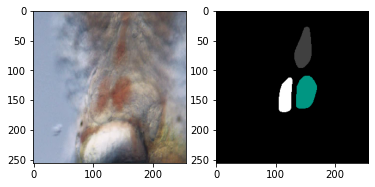

Epoch 16/250
250/250 [==============================] - ETA: 0s - loss: 0.1067 - accuracy: 0.9517
Epoch 00016: val_loss did not improve from 0.69424
250/250 [==============================] - 224s 897ms/step - loss: 0.1067 - accuracy: 0.9517 - val_loss: 0.7492 - val_accuracy: 0.9244


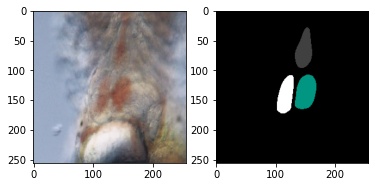

Epoch 17/250
250/250 [==============================] - ETA: 0s - loss: 0.1016 - accuracy: 0.9519
Epoch 00017: val_loss did not improve from 0.69424
250/250 [==============================] - 224s 896ms/step - loss: 0.1016 - accuracy: 0.9519 - val_loss: 0.7490 - val_accuracy: 0.9247


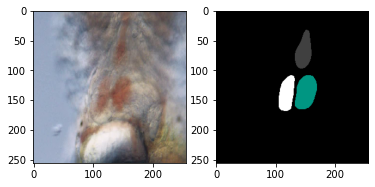

Epoch 18/250
250/250 [==============================] - ETA: 0s - loss: 0.0969 - accuracy: 0.9525
Epoch 00018: val_loss did not improve from 0.69424
250/250 [==============================] - 223s 893ms/step - loss: 0.0969 - accuracy: 0.9525 - val_loss: 0.7470 - val_accuracy: 0.9228


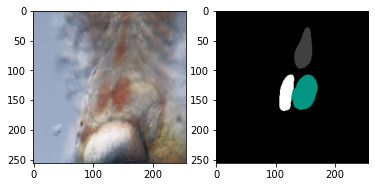

Epoch 19/250
250/250 [==============================] - ETA: 0s - loss: 0.0981 - accuracy: 0.9521
Epoch 00019: val_loss did not improve from 0.69424
250/250 [==============================] - 223s 894ms/step - loss: 0.0981 - accuracy: 0.9521 - val_loss: 0.7512 - val_accuracy: 0.9246


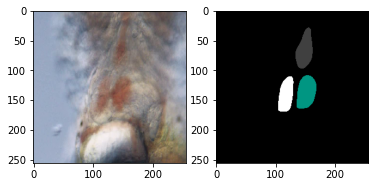

Epoch 20/250
250/250 [==============================] - ETA: 0s - loss: 0.0974 - accuracy: 0.9527
Epoch 00020: val_loss did not improve from 0.69424
250/250 [==============================] - 224s 894ms/step - loss: 0.0974 - accuracy: 0.9527 - val_loss: 0.7492 - val_accuracy: 0.9240


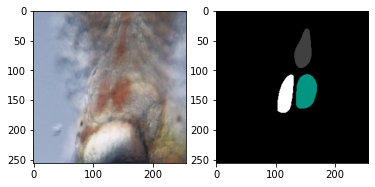

Epoch 21/250
250/250 [==============================] - ETA: 0s - loss: 0.0939 - accuracy: 0.9529
Epoch 00021: val_loss did not improve from 0.69424
250/250 [==============================] - 224s 897ms/step - loss: 0.0939 - accuracy: 0.9529 - val_loss: 0.7495 - val_accuracy: 0.9254


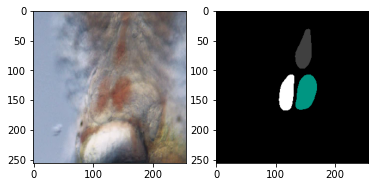

Epoch 22/250
250/250 [==============================] - ETA: 0s - loss: 0.0925 - accuracy: 0.9529
Epoch 00022: val_loss did not improve from 0.69424
250/250 [==============================] - 223s 894ms/step - loss: 0.0925 - accuracy: 0.9529 - val_loss: 0.7508 - val_accuracy: 0.9247


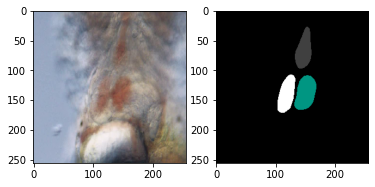

Epoch 23/250
250/250 [==============================] - ETA: 0s - loss: 0.0889 - accuracy: 0.9528
Epoch 00023: val_loss did not improve from 0.69424
250/250 [==============================] - 223s 893ms/step - loss: 0.0889 - accuracy: 0.9528 - val_loss: 0.7510 - val_accuracy: 0.9243


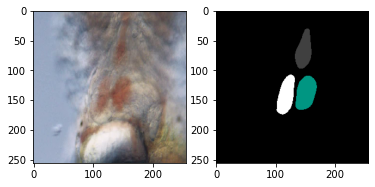

Epoch 24/250
250/250 [==============================] - ETA: 0s - loss: 0.0899 - accuracy: 0.9526
Epoch 00024: val_loss did not improve from 0.69424
250/250 [==============================] - 224s 894ms/step - loss: 0.0899 - accuracy: 0.9526 - val_loss: 0.7466 - val_accuracy: 0.9245


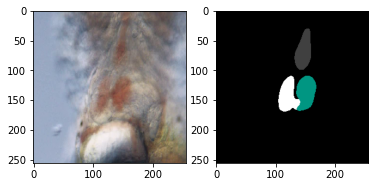

Epoch 25/250
250/250 [==============================] - ETA: 0s - loss: 0.0875 - accuracy: 0.9533
Epoch 00025: val_loss did not improve from 0.69424
250/250 [==============================] - 223s 894ms/step - loss: 0.0875 - accuracy: 0.9533 - val_loss: 0.7494 - val_accuracy: 0.9256


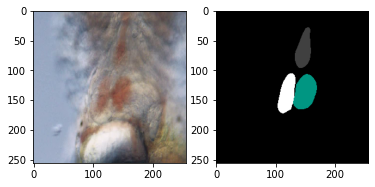

Epoch 26/250
250/250 [==============================] - ETA: 0s - loss: 0.0841 - accuracy: 0.9531
Epoch 00026: val_loss did not improve from 0.69424
250/250 [==============================] - 224s 894ms/step - loss: 0.0841 - accuracy: 0.9531 - val_loss: 0.7495 - val_accuracy: 0.9264


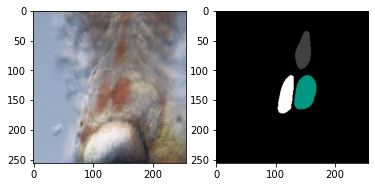

Epoch 27/250
250/250 [==============================] - ETA: 0s - loss: 0.0841 - accuracy: 0.9532
Epoch 00027: val_loss did not improve from 0.69424
250/250 [==============================] - 224s 896ms/step - loss: 0.0841 - accuracy: 0.9532 - val_loss: 0.7497 - val_accuracy: 0.9248


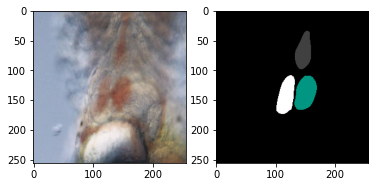

Epoch 28/250
250/250 [==============================] - ETA: 0s - loss: 0.0802 - accuracy: 0.9533
Epoch 00028: val_loss did not improve from 0.69424
250/250 [==============================] - 223s 892ms/step - loss: 0.0802 - accuracy: 0.9533 - val_loss: 0.7505 - val_accuracy: 0.9257


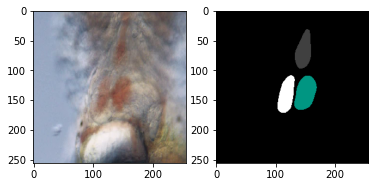

Epoch 29/250
250/250 [==============================] - ETA: 0s - loss: 0.0808 - accuracy: 0.9529
Epoch 00029: val_loss did not improve from 0.69424
250/250 [==============================] - 223s 893ms/step - loss: 0.0808 - accuracy: 0.9529 - val_loss: 0.7487 - val_accuracy: 0.9249


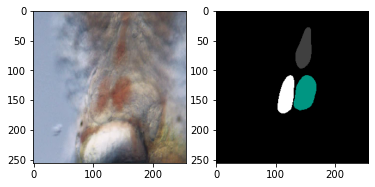

Epoch 30/250
250/250 [==============================] - ETA: 0s - loss: 0.0807 - accuracy: 0.9535
Epoch 00030: val_loss did not improve from 0.69424
250/250 [==============================] - 223s 894ms/step - loss: 0.0807 - accuracy: 0.9535 - val_loss: 0.7494 - val_accuracy: 0.9256


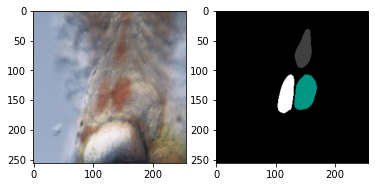

Epoch 31/250
250/250 [==============================] - ETA: 0s - loss: 0.0798 - accuracy: 0.9532
Epoch 00031: val_loss did not improve from 0.69424
250/250 [==============================] - 223s 892ms/step - loss: 0.0798 - accuracy: 0.9532 - val_loss: 0.7492 - val_accuracy: 0.9249


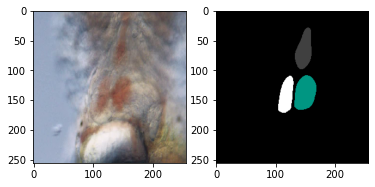

Epoch 32/250
250/250 [==============================] - ETA: 0s - loss: 0.0798 - accuracy: 0.9529
Epoch 00032: val_loss did not improve from 0.69424
250/250 [==============================] - 224s 895ms/step - loss: 0.0798 - accuracy: 0.9529 - val_loss: 0.7510 - val_accuracy: 0.9249


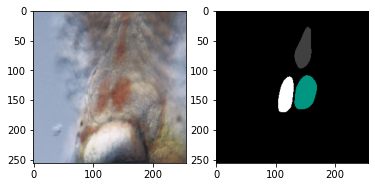

Epoch 33/250
250/250 [==============================] - ETA: 0s - loss: 0.0809 - accuracy: 0.9537
Epoch 00033: val_loss did not improve from 0.69424
250/250 [==============================] - 223s 893ms/step - loss: 0.0809 - accuracy: 0.9537 - val_loss: 0.7507 - val_accuracy: 0.9245


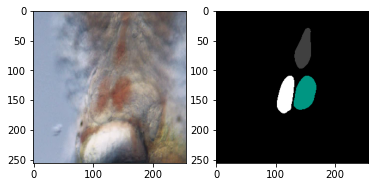

Epoch 34/250
250/250 [==============================] - ETA: 0s - loss: 0.0798 - accuracy: 0.9538
Epoch 00034: val_loss did not improve from 0.69424
250/250 [==============================] - 223s 893ms/step - loss: 0.0798 - accuracy: 0.9538 - val_loss: 0.7511 - val_accuracy: 0.9258


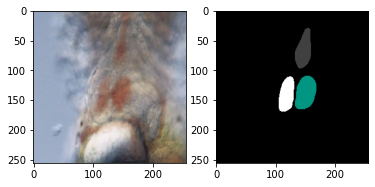

Epoch 35/250
250/250 [==============================] - ETA: 0s - loss: 0.0785 - accuracy: 0.9537
Epoch 00035: val_loss did not improve from 0.69424
250/250 [==============================] - 223s 893ms/step - loss: 0.0785 - accuracy: 0.9537 - val_loss: 0.7486 - val_accuracy: 0.9247
Epoch 00035: early stopping


In [5]:
save_directory = './missing_labels_test'

batch_size = 11
epochs = 250
iterations_per_epoch = 250
data_gen_args = dict(rotation_range=0.3,
                    width_shift_range=0.05,
                    height_shift_range=0.05,
                    shear_range=0.05,
                    zoom_range=0.1,
                    horizontal_flip=True,
                    fill_mode='nearest')

missing_ratio = 0.0
for missing_ratio in [0.0,0.3,0.7]:
    
    # Clear learned masks
    learned_masks = []
    
    print('---------------------')
    print('Missing Ratio: %f'%missing_ratio)
    print('---------------------')

    Path('%s/%s'%(save_directory,missing_ratio)).mkdir(exist_ok=True)

    train_gen = train_generator(batch_size=batch_size,
                                      train_path='../data/train_images',
                                      image_folder='ventral_samples',
                                      mask_folders=['ventral_mask_atrium', 'ventral_mask_bulbus', 'ventral_mask_heart'],
                                      heterogeneously_labeled_masks=['ventral_mask_atrium', 'ventral_mask_bulbus',
                                                                     'ventral_mask_heart'],
                                      missing_labels_ratio=missing_ratio,
                                      aug_dict=data_gen_args,
                                      image_color_mode='rgb',
                                      target_size=(256, 256))
    val_datagen = ImageDataGenerator()
    val_gen = val_datagen.flow(X_test, Y_test, batch_size=batch_size)
    model = unet(adaptive_dice_loss,input_size = (256,256,3),output_filters=4)
    model_checkpoint = ModelCheckpoint('%s/%s/weights_custom_loss.hdf5'%(save_directory,missing_ratio), monitor='val_loss', verbose=1, save_best_only=True)
    early_stopping = EarlyStopping(monitor="val_loss",verbose = 1,mode='min',patience=30)
    reduce_lr =  ReduceLROnPlateau(monitor = "val_loss", factor = 0.5, patience = 10,verbose = 0, mode = "auto", epsilon = 1e-04, cooldown = 0,min_lr = 1e-5)
    history = model.fit_generator(train_gen,steps_per_epoch=iterations_per_epoch,epochs=epochs,callbacks=[model_checkpoint,CustomCallback(),early_stopping,reduce_lr],validation_data=val_gen,verbose=1)

    with open('%s/%s/history'%(save_directory,missing_ratio), 'wb') as file_pi:
        pickle.dump(history.history, file_pi)
    with open('%s/%s/learned_masks'%(save_directory,missing_ratio), 'wb') as file_pi:
        pickle.dump(learned_masks, file_pi)

In [ ]:
sys.stdout.close()
sys.stdout=stdoutOrigin

In [ ]:

i=0
for a in train_gen:
    print(adaptive_dice_loss(a[1],model.predict(a[0])))
    i+=1
    if i>100:
        break

In [ ]:
batch_size = 11
epochs = 2
iterations_per_epoch = 300

model = unet(adaptive_dice_loss,input_size = (256,256,3),output_filters=3)
#model.load_weights('missing_labels_test/0.1/weights.hdf5')

data_gen_args = dict(rotation_range=0.3,
                    width_shift_range=0.05,
                    height_shift_range=0.05,
                    shear_range=0.05,
                    zoom_range=0.1,
                    horizontal_flip=True,
                    fill_mode='nearest')

train_gen = train_generator(batch_size=batch_size,
                                  train_path='../data/train_images',
                                  image_folder='ventral_samples',
                                  mask_folders=['ventral_mask_atrium', 'ventral_mask_bulbus', 'ventral_mask_heart'],
                                  heterogeneously_labeled_masks=['ventral_mask_atrium', 'ventral_mask_bulbus',
                                                                 'ventral_mask_heart'],
                                  missing_labels_ratio=0.1,
                                  aug_dict=data_gen_args,
                                  image_color_mode='rgb',
                                  target_size=(256, 256))

In [ ]:
dir_name = 'test'

os.mkdir('./missing_labels_test/%s'%dir_name)


model_checkpoint = ModelCheckpoint('missing_test.hdf5', monitor='val_loss', verbose=1, save_best_only=True)
early_stopping = EarlyStopping(monitor="val_loss",verbose = 1,mode='min',patience=40)
reduce_lr =  ReduceLROnPlateau(monitor = "val_loss", factor = 0.5, patience = 10,verbose = 0, mode = "auto", epsilon = 1e-04, cooldown = 0,min_lr = 1e-5)
model.fit_generator(train_gen,steps_per_epoch=iterations_per_epoch,epochs=epochs,callbacks=[model_checkpoint,early_stopping,reduce_lr],validation_data=val_gen)

In [ ]:
sys.stdout.close()
sys.stdout=stdoutOrigin

In [ ]:
image_number = 2

image = Image.new('RGB', (256, 256))
maskk = model.predict(X_test[image_number].reshape(1,256,256,3))[0]
for i in range(maskk.shape[0]):
    for j in range(maskk.shape[1]):
        clazz = np.argmax(maskk[i,j])
        if clazz == 0:
            image.putpixel((j,i),(33,33,33))
        if clazz == 1:
            image.putpixel((j,i),(20,20,20))
        if clazz == 2:
            image.putpixel((j,i),(19,19,19))
        if clazz == 3:
            image.putpixel((j,i),(0,0,0))
plt.imshow(X_test[image_number])
plt.show()
plt.imshow(image)
plt.show()

In [ ]:
model = unet(adaptive_dice_loss,input_size = (256,256,3),output_filters=3)
model.load_weights('missing_labels_test/0.6000000000000001/weights.hdf5')

batch_size = 11
epochs = 2
iterations_per_epoch = 300

data_gen_args = dict(rotation_range=0.3,
                    width_shift_range=0.05,
                    height_shift_range=0.05,
                    shear_range=0.05,
                    zoom_range=0.1,
                    horizontal_flip=True,
                    fill_mode='nearest')

train_gen = train_generator(batch_size=batch_size,
                                  train_path='../data/train_images',
                                  image_folder='ventral_samples',
                                  mask_folders=['ventral_mask_atrium', 'ventral_mask_bulbus', 'ventral_mask_heart'],
                                  heterogeneously_labeled_masks=['ventral_mask_atrium', 'ventral_mask_bulbus',
                                                                 'ventral_mask_heart'],
                                  missing_labels_ratio=0.1,
                                  aug_dict=data_gen_args,
                                  image_color_mode='rgb',
                                  target_size=(256, 256))


In [ ]:
from scipy.special import softmax

mask = predicted[1].argmax(axis=-1)[...,None] == np.arange(predicted[1].shape[-1])
out = mask.astype(predicted[1].dtype)

In [ ]:
import pickle

file = open("missing_labels_test/0.0/learned_masks",'rb')
object_file = pickle.load(file)